In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('data.csv')

In [79]:
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


In [81]:
df.shape

(181915, 12)

In [82]:
df.isnull().sum(axis=0)

COUNTRY                   0
CODE_TIME                 0
TIME                      0
YEAR                      0
MONTH                     0
MONTH_NAME                0
PRODUCT                   0
VALUE                     0
DISPLAY_ORDER             0
yearToDate                0
previousYearToDate    17105
share                     0
dtype: int64

### 'data.csv' dataset içinde bulunan kolonların açıklamaları & veri keşfi
- <b>COUNTRY</b>: Ülkenin adı
- <b>CODE_TIME</b>: Ayı ve yılı temsil eden bir kod (örneğin, Ocak 2010 için JAN2010)
- <b>TIME</b>: İnsanlar tarafından daha okunabilir biçimde ay ve yıl (örneğin, Ocak 2010)
- <b>YEAR</b>: Verilerin yılı
- <b>MONTH</b>: Rakam olarak verinin ayı (1-12)
- <b>MONTH_NAME</b>: Dizi olarak verinin ayı (örneğin, Ocak)
- <b>PRODUCT</b>: Enerji ürününün türü (örneğin, Hidroelektrik, Rüzgar, Güneş)
- <b>VALUE</b>: Gigawatt-saat (GWh) cinsinden üretilen elektrik miktarı
- <b>DISPLAY_ORDER</b>: Ürünlerin görüntülenmesi gereken sıra
- <b>yearToDate</b>: GWh cinsinden cari yıl için cari aya kadar üretilen elektrik miktarı
- <b>previousYearToDate</b>: Bir önceki yıl için içinde bulunulan aya kadar üretilen elektrik miktarı GWh cinsinden
- <b>share</b>: Ürünün ülke için toplam elektrik üretimi içindeki ondalık biçimdeki payı.

>Kategorik Değişkenler
- COUNTRY
- CODE_TIME
- TIME
- MONTH_NAME
- PRODUCT
>Rakamsal Değişkenler
- YEAR
- MONTH
- VALUE
- DISPLAY_ORDER
- yearToDate
- previousYearToDate
- share

In [83]:
df.drop(['CODE_TIME', 'TIME', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate'], axis=1, inplace=True)

In [84]:
df.rename(columns={'COUNTRY':'country',
                   'YEAR':'year',
                   'MONTH':'month',
                   'MONTH_NAME':'month_name',
                   'PRODUCT':'product',
                   'VALUE':'value'},
          inplace=True)

In [85]:
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

In [86]:
filt = (df['country'] == 'Republic of Turkiye')
df = df.loc[filt]

In [87]:
df.head()

,country,year,month,month_name,product,value,share,datetime
763,Republic of Turkiye,2010,1,January,Hydro,4186.449,0.248737,2010-01-01
764,Republic of Turkiye,2010,1,January,Wind,240.631,0.014297,2010-01-01
765,Republic of Turkiye,2010,1,January,Solar,0.000,0.000000,2010-01-01
766,Republic of Turkiye,2010,1,January,Geothermal,45.985,0.002732,2010-01-01
767,Republic of Turkiye,2010,1,January,Other renewables,0.000,0.000000,2010-01-01


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4094 entries, 763 to 181708
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     4094 non-null   object        
 1   year        4094 non-null   int64         
 2   month       4094 non-null   int64         
 3   month_name  4094 non-null   object        
 4   product     4094 non-null   object        
 5   value       4094 non-null   float64       
 6   share       4094 non-null   float64       
 7   datetime    4094 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 287.9+ KB


In [91]:
filt = (df['product'] == 'Net electricity production')
df_net = df.loc[filt]

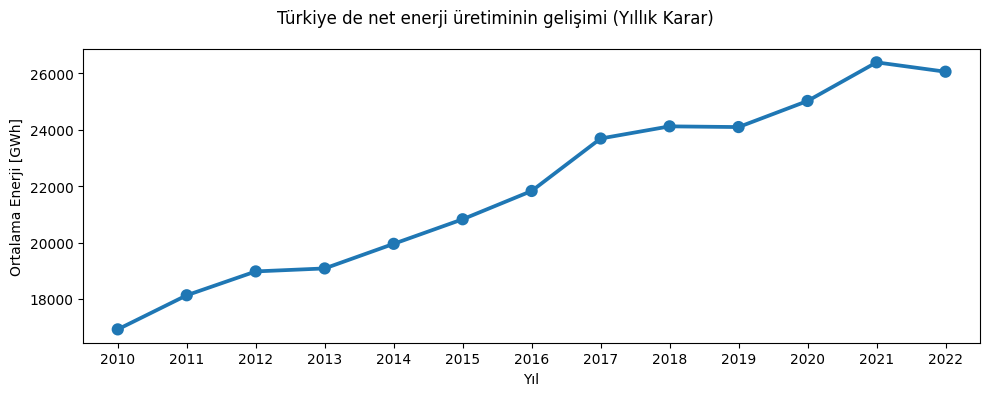

In [94]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle("Türkiye'de net enerji üretiminin gelişimi (Yıllık Karar)")

sns.pointplot(data=df_net, x='year', y='value', ax=ax, estimator='mean', errorbar=None)
ax.set_xlabel('Yıl')
ax.set_ylabel('Ortalama Enerji [GWh]')

plt.tight_layout()

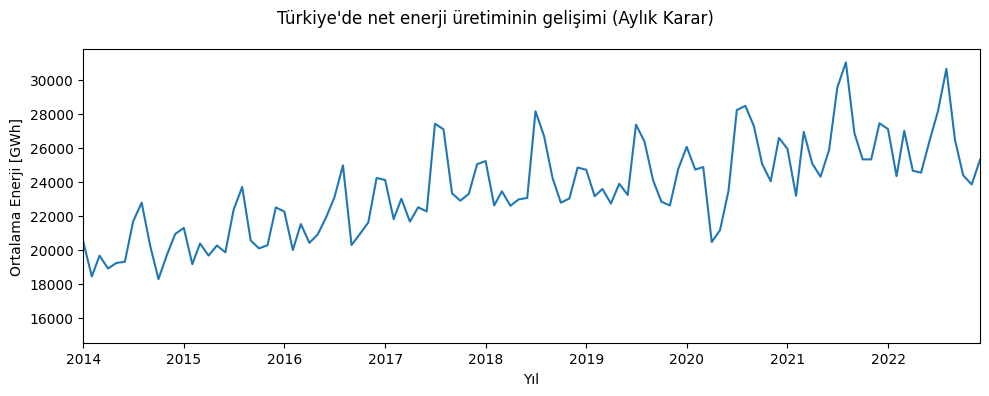

In [95]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle("Türkiye'de net enerji üretiminin gelişimi (Aylık Karar)")

sns.lineplot(data=df_net[['datetime','value']], x='datetime', y='value')
ax.set_xlabel('Yıl')
ax.set_ylabel('Ortalama Enerji [GWh]')
ax.set_xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2022-12-01'))

plt.tight_layout()